In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3028	Val Loss:	0.4961	Accuracy:	0.7746	F1:	0.5681
2 / 30: Train Loss:	0.2232	Val Loss:	0.3569	Accuracy:	0.8534	F1:	0.8203
3 / 30: Train Loss:	0.1538	Val Loss:	0.2871	Accuracy:	0.8906	F1:	0.8564
4 / 30: Train Loss:	0.0927	Val Loss:	0.3524	Accuracy:	0.8928	F1:	0.8470
5 / 30: Train Loss:	0.0636	Val Loss:	0.3772	Accuracy:	0.8972	F1:	0.8532
6 / 30: Train Loss:	0.0563	Val Loss:	0.6523	Accuracy:	0.8053	F1:	0.7788
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.80      0.77      0.79       119
      struct       0.92      0.93      0.93       338

    accuracy                           0.89       457
   macro avg       0.86      0.85      0.86       457
weighted avg       0.89      0.89      0.89       457

test results:
              precision    recall  f1-score   support

       bknow       0.68      0.69      0.68        67
      struct       0.89      0

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3016	Val Loss:	0.5391	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.2934	Val Loss:	0.5724	Accuracy:	0.7396	F1:	0.4252
3 / 30: Train Loss:	0.2863	Val Loss:	0.5021	Accuracy:	0.8140	F1:	0.6796
4 / 30: Train Loss:	0.2915	Val Loss:	0.5772	Accuracy:	0.7396	F1:	0.4252
5 / 30: Train Loss:	0.2943	Val Loss:	0.5822	Accuracy:	0.7396	F1:	0.4252
6 / 30: Train Loss:	0.2891	Val Loss:	0.5781	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.90      0.32      0.47       119
      struct       0.80      0.99      0.89       338

    accuracy                           0.81       457
   macro avg       0.85      0.65      0.68       457
weighted avg       0.83      0.81      0.78       457

test results:
              precision    recall  f1-score   support

       bknow       0.67      0.36      0.47        67
      struct       0.80      0

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3072	Val Loss:	0.5770	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.2960	Val Loss:	0.5872	Accuracy:	0.7396	F1:	0.4252
3 / 30: Train Loss:	0.2949	Val Loss:	0.5828	Accuracy:	0.7396	F1:	0.4252
4 / 30: Train Loss:	0.2915	Val Loss:	0.5872	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

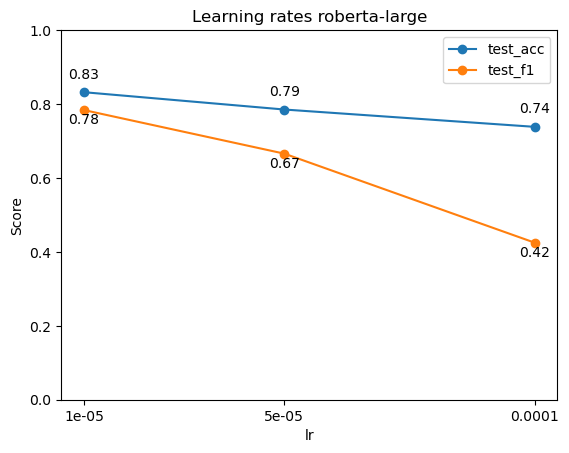

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f